In [1]:
import matplotlib
matplotlib.use('pdf')

%pylab inline
import seaborn; seaborn.set_style('whitegrid')
from avocado import *

Populating the interactive namespace from numpy and matplotlib


## Summary of Predictive Tasks

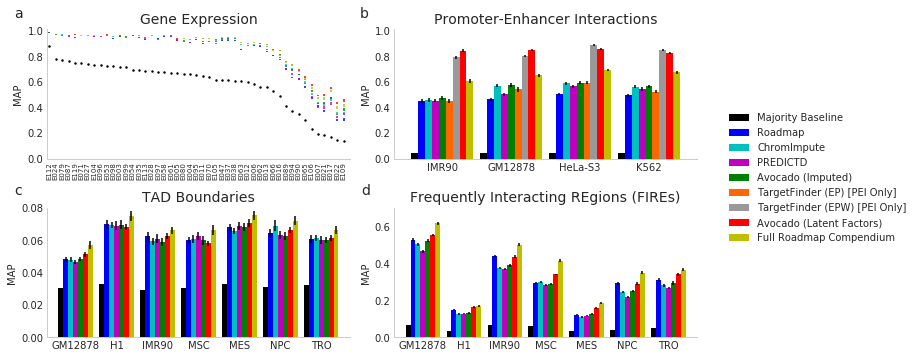

In [2]:
plt.figure(figsize=(10, 5), facecolor='w')

celltypes = numpy.array(['E003', 'E004', 'E005', 'E006', 'E007', 'E011', 'E012', 'E013', 'E016',
        'E017', 'E021', 'E022', 'E024', 'E027', 'E028', 'E035', 'E037', 'E038', 'E047',
        'E053', 'E054', 'E058', 'E061', 'E062', 'E063', 'E065', 'E066', 'E070', 'E071',
        'E079', 'E080', 'E087', 'E089', 'E090', 'E094', 'E095', 'E096', 'E097', 'E098',
        'E099', 'E104', 'E105', 'E106', 'E109', 'E112', 'E113', 'E119'])

a = [numpy.load('outputs/RNAseq.{}.map20.npy'.format(celltype)) for celltype in celltypes]
a = numpy.array(a)
sqrt_n = numpy.sqrt(a.shape[2])
idxs = numpy.argsort(a.mean(axis=2)[:,6])[::-1]
a = a[idxs]
x = numpy.arange(len(a))

plt.subplot(221)
plt.title("Gene Expression", fontsize=14)

plt.errorbar(x, a[:,0].mean(axis=1), color='b', yerr=a[:,0].std(axis=1) / sqrt_n, fmt='none')
plt.errorbar(x, a[:,1].mean(axis=1), color='c', yerr=a[:,1].std(axis=1) / sqrt_n, fmt='none')
plt.errorbar(x, a[:,2].mean(axis=1), color='m', yerr=a[:,2].std(axis=1) / sqrt_n, fmt='none')
plt.errorbar(x, a[:,3].mean(axis=1), color='g', yerr=a[:,3].std(axis=1) / sqrt_n, fmt='none')
plt.errorbar(x, a[:,4].mean(axis=1), color='r', yerr=a[:,4].std(axis=1) / sqrt_n, fmt='none')
plt.errorbar(x, a[:,5].mean(axis=1), color='y', yerr=a[:,5].std(axis=1) / sqrt_n, fmt='none')

plt.scatter(x, a[:,6].mean(axis=1), color='k', s=2, label="Random Baseline")
plt.ylim(0.0, 1.01)
plt.ylabel("MAP", fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(range(len(celltypes)), celltypes[idxs], rotation=90, fontsize=7)
plt.grid(False)
plt.xlim(-0.4, len(celltypes))
plt.text(-5.5, 1.1, "a", fontsize=14)
seaborn.despine()

###

plt.subplot(222)
d = numpy.load("pei_maps20.npy")
sqrt_n = numpy.sqrt(d.shape[2])
x = numpy.arange(len(d))

baseline = [0.0483, 0.047, 0.0476, 0.0474]
plt.title("Promoter-Enhancer Interactions", fontsize=14)

celltypes = ['E017', 'E116', 'E117', 'E123']
celltypes = 'IMR90', 'GM12878', 'HeLa-S3', 'K562'

x0 = plt.bar(x-0.4, baseline, color='k', width=0.1, label="Majority Baseline")
x1 = plt.bar(x-0.3, d[:,0].mean(axis=1), color='b', width=0.1, label="Roadmap")
x2 = plt.bar(x-0.2, d[:,1].mean(axis=1), color='c', width=0.1, label="ChromImpute")
x3 = plt.bar(x-0.1, d[:,2].mean(axis=1), color='m', width=0.1, label="PREDICTD")
x4 = plt.bar(x+0.0, d[:,3].mean(axis=1), color='g', width=0.1, label="Avocado (Imputed)")
x5 = plt.bar(x+0.1, d[:,7].mean(axis=1), color='#FF6600', width=0.1, label="TargetFinder (EP)")
x6 = plt.bar(x+0.2, d[:,6].mean(axis=1), color='0.6', width=0.1, label="TargetFinder (EPW)")
x7 = plt.bar(x+0.3, d[:,4].mean(axis=1), color='r', width=0.1, label="Avocado (Latent Factors)")
x8 = plt.bar(x+0.4, d[:,5].mean(axis=1), color='y', width=0.1, label="Full Roadmap Compendium")

plt.errorbar(x-0.3, d[:,0].mean(axis=1), color='k', yerr=d[:,0].std(axis=1) / sqrt_n, fmt='none')
plt.errorbar(x-0.2, d[:,1].mean(axis=1), color='k', yerr=d[:,1].std(axis=1) / sqrt_n, fmt='none')
plt.errorbar(x-0.1, d[:,2].mean(axis=1), color='k', yerr=d[:,2].std(axis=1) / sqrt_n, fmt='none')
plt.errorbar(x+0.0, d[:,3].mean(axis=1), color='k', yerr=d[:,3].std(axis=1) / sqrt_n, fmt='none')
plt.errorbar(x+0.1, d[:,7].mean(axis=1), color='k', yerr=d[:,7].std(axis=1) / sqrt_n, fmt='none')
plt.errorbar(x+0.2, d[:,6].mean(axis=1), color='k', yerr=d[:,6].std(axis=1) / sqrt_n, fmt='none')
plt.errorbar(x+0.3, d[:,4].mean(axis=1), color='k', yerr=d[:,4].std(axis=1) / sqrt_n, fmt='none')
plt.errorbar(x+0.4, d[:,5].mean(axis=1), color='k', yerr=d[:,5].std(axis=1) / sqrt_n, fmt='none')

plt.ylim(0.0, 1.01)
plt.ylabel("MAP", fontsize=10)
plt.xticks(range(4), celltypes, fontsize=10)
plt.grid(False)
plt.yticks(fontsize=10)
plt.xlim(-0.7, 3.7)
plt.text(-1.2, 1.1, "b", fontsize=14)
seaborn.despine()


###

plt.subplot(223)
a = numpy.load("TAD_maps20.npy")
sqrt_n = numpy.sqrt(a.shape[2])
celltypes = numpy.array(['E116', 'E003', 'E017', 'E006', 'E004', 'E007', 'E005'])
celltypes = 'GM12878', 'H1', 'IMR90', 'MSC', 'MES', 'NPC', 'TRO'

x = numpy.arange(len(a))
plt.title("TAD Boundaries", fontsize=14)

plt.bar(x-0.36, a[:,6].mean(axis=1), color='k', width=0.12, label="Majority Baseline")
plt.bar(x-0.24, a[:,0].mean(axis=1), color='b', width=0.12, label="Roadmap")
plt.bar(x-0.12, a[:,1].mean(axis=1), color='c', width=0.12, label="ChromImpute")
plt.bar(x+0.00, a[:,2].mean(axis=1), color='m', width=0.12, label="PREDICTD")
plt.bar(x+0.12, a[:,3].mean(axis=1), color='g', width=0.12, label="Avocado (Imputed)")
plt.bar(x+0.24, a[:,4].mean(axis=1), color='r', width=0.12, label="Avocado (Latent Factors)")
plt.bar(x+0.36, a[:,5].mean(axis=1), color='y', width=0.12, label="Full Roadmap Compendium")

plt.errorbar(x-0.24, a[:,0].mean(axis=1), color='k', yerr=a[:,0].std(axis=1) / sqrt_n, fmt='none')
plt.errorbar(x-0.12, a[:,1].mean(axis=1), color='k', yerr=a[:,1].std(axis=1) / sqrt_n, fmt='none')
plt.errorbar(x+0.00, a[:,2].mean(axis=1), color='k', yerr=a[:,2].std(axis=1) / sqrt_n, fmt='none')
plt.errorbar(x+0.12, a[:,3].mean(axis=1), color='k', yerr=a[:,3].std(axis=1) / sqrt_n, fmt='none')
plt.errorbar(x+0.24, a[:,4].mean(axis=1), color='k', yerr=a[:,4].std(axis=1) / sqrt_n, fmt='none')
plt.errorbar(x+0.36, a[:,5].mean(axis=1), color='k', yerr=a[:,5].std(axis=1) / sqrt_n, fmt='none')

plt.ylabel("MAP", fontsize=10)
plt.xticks(range(7), celltypes, fontsize=10)
plt.grid(False)
plt.yticks(fontsize=10)
plt.xlim(-0.7, 6.7)
plt.text(-1.5, 0.088, "c", fontsize=14)
seaborn.despine()
plt.ylim(0, 0.08)

###

plt.subplot(224)
a = numpy.load("FIRE_maps20.npy")
sqrt_n = numpy.sqrt(a.shape[2])
celltypes = numpy.array(['E116', 'E003', 'E017', 'E006', 'E004', 'E007', 'E005'])
celltypes = 'GM12878', 'H1', 'IMR90', 'MSC', 'MES', 'NPC', 'TRO'

x = numpy.arange(len(a))
plt.title("Frequently Interacting REgions (FIREs)", fontsize=14)

plt.bar(x-0.36, a[:,6].mean(axis=1), color='k', width=0.12, label="Majority Baseline")
plt.bar(x-0.24, a[:,0].mean(axis=1), color='b', width=0.12, label="Roadmap")
plt.bar(x-0.12, a[:,1].mean(axis=1), color='c', width=0.12, label="ChromImpute")
plt.bar(x+0.00, a[:,2].mean(axis=1), color='m', width=0.12, label="PREDICTD")
plt.bar(x+0.12, a[:,3].mean(axis=1), color='g', width=0.12, label="Avocado (Imputed)")
plt.bar(x+0.24, a[:,4].mean(axis=1), color='r', width=0.12, label="Avocado (Latent Factors)")
plt.bar(x+0.36, a[:,5].mean(axis=1), color='y', width=0.12, label="Full Roadmap Compendium")

plt.errorbar(x-0.24, a[:,0].mean(axis=1), color='k', yerr=a[:,0].std(axis=1) / sqrt_n, fmt='none')
plt.errorbar(x-0.12, a[:,1].mean(axis=1), color='k', yerr=a[:,1].std(axis=1) / sqrt_n, fmt='none')
plt.errorbar(x+0.00, a[:,2].mean(axis=1), color='k', yerr=a[:,2].std(axis=1) / sqrt_n, fmt='none')
plt.errorbar(x+0.12, a[:,3].mean(axis=1), color='k', yerr=a[:,3].std(axis=1) / sqrt_n, fmt='none')
plt.errorbar(x+0.24, a[:,4].mean(axis=1), color='k', yerr=a[:,4].std(axis=1) / sqrt_n, fmt='none')
plt.errorbar(x+0.36, a[:,5].mean(axis=1), color='k', yerr=a[:,5].std(axis=1) / sqrt_n, fmt='none')

plt.ylim(0.00, 0.7)
plt.ylabel("MAP", fontsize=10)
plt.xticks(range(7), celltypes, fontsize=10)
plt.grid(False)
plt.yticks(fontsize=10)
plt.xlim(-0.7, 6.7)
plt.text(-1.5, 0.77, "d", fontsize=14)
plt.ylim(0, 0.7)
seaborn.despine()

plt.figlegend((x0, x1, x2, x3, x4, x5, x6, x7, x8), ("Majority Baseline", "Roadmap", "ChromImpute", 
    "PREDICTD", "Avocado (Imputed)", "TargetFinder (EP) [PEI Only]", "TargetFinder (EPW) [PEI Only]",
    "Avocado (Latent Factors)", "Full Roadmap Compendium"), bbox_to_anchor=(1.0, 0.5), loc="center left" )
 
plt.tight_layout()
plt.savefig('Avocado-tasks.pdf')
plt.show()

## Gene Expression Prediction
### Data Inspection

Previously we were trying to predict gene expression using either the epigenetic data or the Avocado latent factors. This initially appeared to perform well, with the Avocado latent factors outperforming in every cell type both the set of Roadmap epigenomic marks or the full set of imputed marks. However, we found that a majority baseline for each gene, such that the predictor was the number of other cell types in which that gene was active, outperformed Avocado in many cell types. This is unsurprising given that these phenomena are shared across many cell types.

Let's start off by looking at the data set itself.

In [3]:
y = numpy.load("datasets/RNAseq.npy")
y = y.reshape(47, y.shape[0] // 47).T

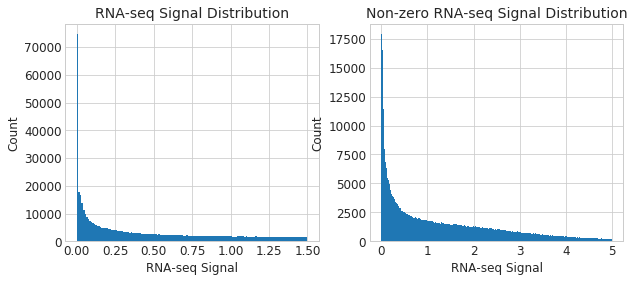

In [4]:
plt.figure(figsize=(10, 4))
plt.subplot(121)
plt.title("RNA-seq Signal Distribution", fontsize=14)
plt.hist(y.flatten(), bins=numpy.arange(0, 1.51, 0.01))
plt.xlabel("RNA-seq Signal", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplot(122)
plt.title("Non-zero RNA-seq Signal Distribution", fontsize=14)
plt.hist(y[y > 0], bins=numpy.arange(0, 5, 0.01))
plt.xlabel("RNA-seq Signal", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

The majority of genes appear to have zero RNA-seq signal. This makes sense, because theoretically when a gene is inactive, it should not transcribe at all. However, there is some leakage and so a low RNA-seq level may be present. We thresholded the signal at a RPKM of 0.5 to account for this low level transcription. When we look at all non-zero expressed genes, we see that there are still quite a few genes that have higher expression values.

Let's now look at our binarized signal. How many cell types is each gene expressed in?

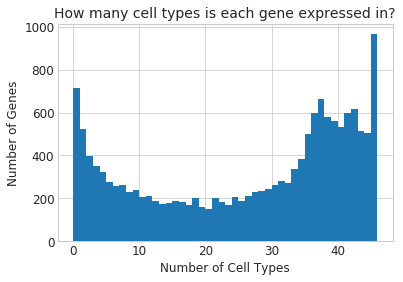

In [5]:
plt.title("How many cell types is each gene expressed in?", fontsize=14)
plt.hist((y >= 0.5).sum(axis=1), bins=range(0, 47, 1))
plt.xlabel("Number of Cell Types", fontsize=12)
plt.ylabel("Number of Genes", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

It looks like many genes are expressed in none or one cell types. This make seem unintuitive at first, but makes sense because we could have set a higher threshold on the expression, and some genes may not have been expressed in the subset of cell types that we considered.

Let's view this from another angle now. What proportion of genes are expressed in each cell type?

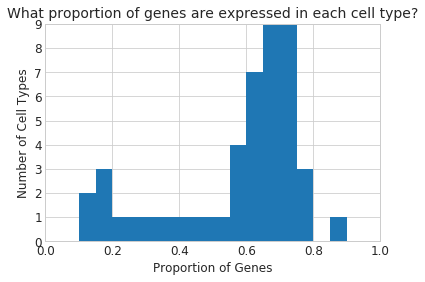

In [6]:
plt.figure(figsize=(6, 4))
plt.title("What proportion of genes are expressed in each cell type?", fontsize=14)
plt.hist((y >= 0.5).mean(axis=0), bins=numpy.arange(0, 1.01, 0.05))
plt.xlabel("Proportion of Genes", fontsize=12)
plt.ylabel("Number of Cell Types", fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlim(0, 1)
plt.ylim(0, 9)
plt.show()

### Prediction Tasks

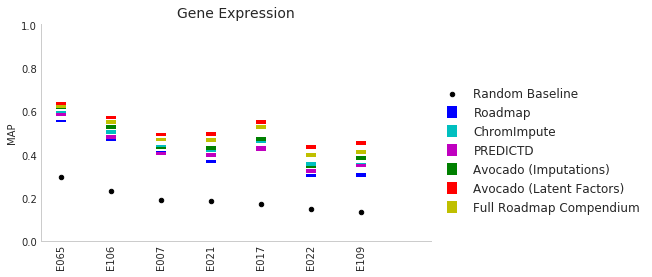

In [7]:
celltypes = numpy.array(['E003', 'E004', 'E005', 'E006', 'E007', 'E011', 'E012', 'E013', 'E016',
        'E017', 'E021', 'E022', 'E024', 'E027', 'E028', 'E035', 'E037', 'E038', 'E047',
        'E053', 'E054', 'E058', 'E061', 'E062', 'E063', 'E065', 'E066', 'E070', 'E071',
        'E079', 'E080', 'E087', 'E089', 'E090', 'E094', 'E095', 'E096', 'E097', 'E098',
        'E099', 'E104', 'E105', 'E106', 'E109', 'E112', 'E113', 'E119'])

a = [numpy.load('outputs/RNAseq.{}.map20.npy'.format(celltype)) for celltype in celltypes]
a = numpy.array(a)
sqrt_n = numpy.sqrt(a.shape[2])
idxs = numpy.argsort(a.mean(axis=2)[:,6])[::-1]
a = a[idxs]
x = numpy.arange(7)

plt.figure(figsize=(7, 4), facecolor='w')
plt.title("Gene Expression", fontsize=14)

plt.errorbar(x, a[40:,0].mean(axis=1), color='b', elinewidth=10, yerr=a[40:,0].std(axis=1) / sqrt_n, fmt='none', label="Roadmap")
plt.errorbar(x, a[40:,1].mean(axis=1), color='c', elinewidth=10, yerr=a[40:,1].std(axis=1) / sqrt_n, fmt='none', label="ChromImpute")
plt.errorbar(x, a[40:,2].mean(axis=1), color='m', elinewidth=10, yerr=a[40:,2].std(axis=1) / sqrt_n, fmt='none', label="PREDICTD")
plt.errorbar(x, a[40:,3].mean(axis=1), color='g', elinewidth=10, yerr=a[40:,3].std(axis=1) / sqrt_n, fmt='none', label="Avocado (Imputations)")
plt.errorbar(x, a[40:,4].mean(axis=1), color='r', elinewidth=10, yerr=a[40:,4].std(axis=1) / sqrt_n, fmt='none', label="Avocado (Latent Factors)")
plt.errorbar(x, a[40:,5].mean(axis=1), color='y', elinewidth=10, yerr=a[40:,5].std(axis=1) / sqrt_n, fmt='none', label="Full Roadmap Compendium")
plt.scatter(x, a[40:,6].mean(axis=1), color='k', s=20, label="Random Baseline")

plt.ylim(0.0, 1.01)
plt.ylabel("MAP", fontsize=10)
plt.yticks(fontsize=10)
plt.xticks(range(len(celltypes[40:])), celltypes[idxs[40:]], rotation=90, fontsize=10)
plt.grid(False)
plt.xlim(-0.4, 7.4)
plt.legend(loc=(1.01, 0.1), fontsize=12)
seaborn.despine()

In [8]:
a[40:,0]

array([[0.54486222, 0.55556984, 0.57074186, 0.56986826, 0.54084143,
        0.55701251, 0.60531528, 0.55532981, 0.52551109, 0.54639422,
        0.55602986, 0.61109253, 0.51922155, 0.49432326, 0.54726551,
        0.57612883, 0.5462961 , 0.57085849, 0.60362079, 0.56889083],
       [0.47851359, 0.46947185, 0.5103154 , 0.45402964, 0.48233323,
        0.51275897, 0.49891654, 0.49872652, 0.4444103 , 0.45479808,
        0.47136386, 0.50027033, 0.47022687, 0.43767614, 0.35683945,
        0.47026842, 0.53364987, 0.4552014 , 0.51421939, 0.45651968],
       [0.39541895, 0.43243836, 0.4133205 , 0.40513857, 0.39442785,
        0.42691944, 0.43018559, 0.42783895, 0.42631022, 0.38355017,
        0.46868167, 0.37939693, 0.35616986, 0.4356705 , 0.42038173,
        0.38513694, 0.45223134, 0.40167686, 0.38274798, 0.42052998],
       [0.36318656, 0.37098882, 0.37524552, 0.35590484, 0.34656184,
        0.35644088, 0.41623745, 0.37245214, 0.38165046, 0.34507211,
        0.45092979, 0.36205571, 0.39222708, 0

In [29]:
celltypes = numpy.array(['E003', 'E004', 'E005', 'E006', 'E007', 'E011', 'E012', 'E013', 'E016',
        'E017', 'E021', 'E022', 'E024', 'E027', 'E028', 'E035', 'E037', 'E038', 'E047',
        'E053', 'E054', 'E058', 'E061', 'E062', 'E063', 'E065', 'E066', 'E070', 'E071',
        'E079', 'E080', 'E087', 'E089', 'E090', 'E094', 'E095', 'E096', 'E097', 'E098',
        'E099', 'E104', 'E105', 'E106', 'E109', 'E112', 'E113', 'E119'])

e = [numpy.load('outputs/RNAseq.{}.map20.npy'.format(celltype)) for celltype in celltypes]
e = numpy.array(e)
d = e.mean(axis=2)
f = e.std(axis=2)

idxs = numpy.argsort(d[:,6])[::-1]
d, e, f = d[idxs], e[idxs], f[idxs]

idx = d[:,4] < d[:,5]

print "Full Roadmap Compendium > Avocado in {} celtypes".format(idx.sum())
print "Full Roadmap Compendium < Avocado in {} celtypes".format((1-idx).sum())
print 
print "Avocado - Full Roadmap Compendium on Average: ", (d[:,4] - d[:,5]).mean()
print "Avocado - Full Roadmap Compendium when FRC > Avocado: ", (d[idx, 4] - d[idx, 5]).mean()
print "Avocado - Full Roadmap Compendium in Worst 7 Cell Types: ", (d[40:,4] - d[40:,5]).mean()
print "Avocado - Roadmap in Worst 7 Cell Types: ", (d[40:,4] - d[40:,0]).mean()
print "Avocado - Full Roadmap Compendium Maximum: ", (d[:,4] - d[:,5]).max()
print "Avocado - Full Roadmap Compendium Minimum: ", (d[:,4] - d[:,5]).min()
print "Avocado - Roadmap Maximum: ", (d[:,4] - d[:,0]).max()
print "Avocado - Roadmap Minimum: ", (d[:,4] - d[:,0]).min()

print
print "Exclusing Full Roadmap Compendium, What is the Best Feature Set?"
print d[:,:5].argmax(axis=1)
print
print "What celltypues have ChromImpute > Avocado?"
print celltypes[idxs][d[:,:5].argmax(axis=1) == 1]

Full Roadmap Compendium > Avocado in 13 celtypes
Full Roadmap Compendium < Avocado in 34 celtypes

Avocado - Full Roadmap Compendium on Average:  0.005144616018120103
Avocado - Full Roadmap Compendium when FRC > Avocado:  -0.0017858317176214435
Avocado - Full Roadmap Compendium in Worst 7 Cell Types:  0.026654919990869268
Avocado - Roadmap in Worst 7 Cell Types:  0.10757950812511993
Avocado - Full Roadmap Compendium Maximum:  0.040364601075437656
Avocado - Full Roadmap Compendium Minimum:  -0.004664132357845019
Avocado - Roadmap Maximum:  0.14868736325943066
Avocado - Roadmap Minimum:  0.004344312424465535

Exclusing Full Roadmap Compendium, What is the Best Feature Set?
[4 4 4 4 4 4 4 4 4 1 4 4 4 1 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4]

What celltypues have ChromImpute > Avocado?
['E053' 'E054']


These results seem reasonable at first glance. Cell types that have fewer genes active with have a lower baseline (in black) and be more difficult for any feature set to parse. The Avocado feature set outperforms the others in every cell type, but not by a massive amount like we saw in the cross cell type setting. Using all measurements frequently outperforms using the other subsets of epigenomic data, but doesn't always. The ChromImpute imputations frequently do the best of any imputation strategy, likely in part because it's explicitly exposed to RNA-seq during its training process.

(-0.3, 5.3)

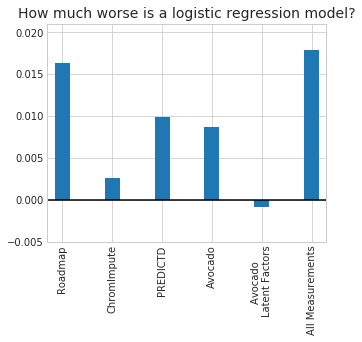

In [10]:
d = [numpy.load('outputs/RNAseq.{}.cvtree.npy'.format(i)) for i in range(47)]
e = [numpy.load('outputs/RNAseq.{}.cv.npy'.format(i)) for i in range(47)]
d = numpy.array(d)
e = numpy.array(e)
idxs = numpy.argsort(d[:,4])[::-1]
d = d[idxs]
e = e[idxs]
x = range(len(d))

xticks = ['Roadmap', 'ChromImpute', 'PREDICTD', 'Avocado', 'Avocado \nLatent Factors', 'All Measurements']

f = []
for i in range(6):
    f.append( (d[:,i] - e[:,i]).mean() )

plt.figure(figsize=(5, 4), facecolor='w')
plt.title("How much worse is a logistic regression model?", fontsize=14)
plt.plot([-1, 7], [0, 0], color='k')
plt.bar(range(6), f, width=0.3)
plt.xticks(range(6), xticks, rotation=90, fontsize=10)
plt.yticks(fontsize=10)
plt.ylim(-0.005, 0.021)
plt.xlim(-0.3, 5.3)

In [11]:
f

[0.016376062560903515,
 0.002601972779570798,
 0.00989367723707017,
 0.008703416918717895,
 -0.000876660013210567,
 0.017959387679392806]

### TAD Boundaries
#### Data Inspection

Let's now turn to looking at TAD boundaries. We can look at the distribution of TAD boundaries in the same way we looked at the distribution of expressed genes.

In [12]:
import itertools

celltype_idx = ('GM12878', 'E116'), ('H1', 'E003'), ('IMR90', 'E017'), ('MSC', 'E006'), ('MES', 'E004'), ('NPC', 'E007'), ('TRO', 'E005')

TADs = []
for (celltype, _), chrom in itertools.product(celltype_idx, range(1, 23)):
    TADs.append(numpy.load('Schmitt/{}_chr{}_TADs.npy'.format(celltype, chrom)))

TADs = numpy.concatenate(TADs)
TADs = TADs.reshape(7, 72036)

We can visualize it quickly to see where TAD boundaries form and where there's consistent.

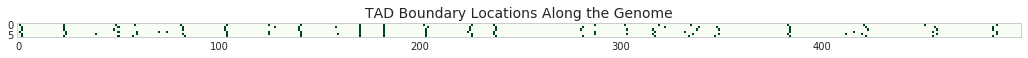

In [13]:
plt.figure(figsize=(18, 6))
plt.title("TAD Boundary Locations Along the Genome", fontsize=14)
plt.imshow(TADs[:,500:1000], cmap='Greens')
plt.grid(False)

It looks like there are some places that are conserved across all or most cell lines, and others are scattered. This is either due to cell type variation or due to errors in the TAD caller. However, since these at at 40 kbp resolution, it seems less likely that these are due to variance in the TAD caller versus actual biology.

Let's look at the distribution of the number of TADs active in a cell type.

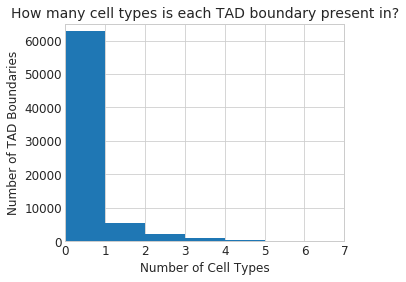

In [14]:
plt.figure(figsize=(5, 4))
plt.title("How many cell types is each TAD boundary present in?", fontsize=14)
plt.hist(TADs.sum(axis=0), bins=range(0, 8))
plt.xlim(0, 7)
plt.ylim(0, 65000)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel("Number of Cell Types", fontsize=12)
plt.ylabel("Number of TAD Boundaries", fontsize=12)
plt.show()

And now the percentage of 40 kbp positions that are TAD boundaries in the genome.

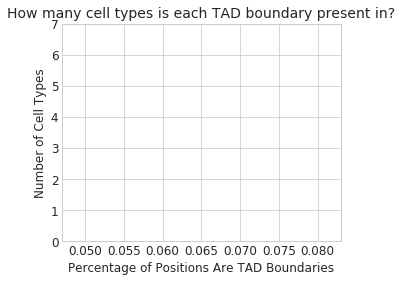

In [15]:
plt.figure(figsize=(5, 4))
plt.title("How many cell types is each TAD boundary present in?", fontsize=14)
plt.hist(TADs.mean(axis=1), bins=numpy.arange(0.05, 0.08, 0.002))
plt.xlim(0.047, 0.083)
plt.ylim(0, 7)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylabel("Number of Cell Types", fontsize=12)
plt.xlabel("Percentage of Positions Are TAD Boundaries", fontsize=12)
plt.show()

Looks like, fairly consistently across cell types, that around 6% of the genome is at a TAD boundary. It makes sense that this percentage would be a small number given that TADs are the large unit and that boundaries simply deliniate when one ends and another begins.

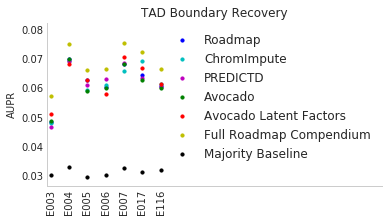

In [16]:
a = numpy.load("TAD_maps20.npy")
celltypes = numpy.array(['E116', 'E003', 'E017', 'E006', 'E004', 'E007', 'E005'])
idx = numpy.argsort(celltypes)
celltypes = celltypes[idx]

x = range(len(a))

plt.figure(figsize=(6, 3), facecolor='w')
plt.title("TAD Boundary Recovery", fontsize=12)
plt.scatter(x, a[:,0].mean(axis=1), color='b', s=10, label="Roadmap")
plt.scatter(x, a[:,1].mean(axis=1), color='c', s=10, label="ChromImpute")
plt.scatter(x, a[:,2].mean(axis=1), color='m', s=10, label="PREDICTD")
plt.scatter(x, a[:,3].mean(axis=1), color='g', s=10, label="Avocado")
plt.scatter(x, a[:,4].mean(axis=1), color='r', s=10, label="Avocado Latent Factors")
plt.scatter(x, a[:,5].mean(axis=1), color='y', s=10, label="Full Roadmap Compendium")
plt.scatter(x, a[:,6].mean(axis=1), color='k', s=10, label="Majority Baseline")
plt.legend(fontsize=12)
#plt.ylim(0.025, 0.)
plt.ylabel("AUPR", fontsize=10)
plt.xticks(range(7), celltypes, rotation=90, fontsize=10)
plt.grid(False)
plt.yticks(fontsize=10)
plt.xlim(-0.2, 18)
seaborn.despine()
plt.show()

## FIREs

In [17]:
import itertools

celltype_idx = ('GM12878', 'E116'), ('H1', 'E003'), ('IMR90', 'E017'), ('MSC', 'E006'), ('MES', 'E004'), ('NPC', 'E007'), ('TRO', 'E005')

FIREs = []
for (celltype, _), chrom in itertools.product(celltype_idx, range(1, 23)):
    FIREs.append(numpy.load('Schmitt/{}_chr{}_FIRE.npy'.format(celltype, chrom)))

FIREs = numpy.concatenate(FIREs)
FIREs = FIREs.reshape(7, 72036)

(-1, 8)

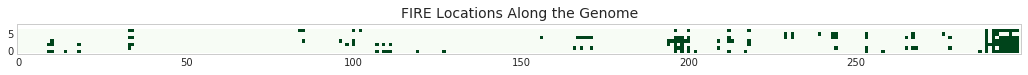

In [18]:
plt.figure(figsize=(18, 6))
plt.title("FIRE Locations Along the Genome", fontsize=14)
plt.imshow(FIREs[:,700:1000], interpolation='nearest', cmap='Greens')
plt.grid(False)
plt.ylim(-1, 8)

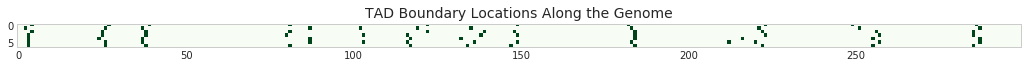

In [19]:
plt.figure(figsize=(18, 6))
plt.title("TAD Boundary Locations Along the Genome", fontsize=14)
plt.imshow(TADs[:,700:1000], cmap='Greens')
plt.grid(False)

In [20]:
FIREs.sum(axis=1)

array([4755., 2470., 4727., 4239., 2478., 3020., 3615.])

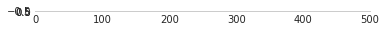

In [21]:
plt.imshow(FIREs[4:5, :500])

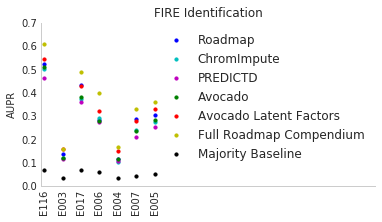

In [22]:
a = numpy.load("FIRE_auprs.npy")
celltypes = numpy.array(['E116', 'E003', 'E017', 'E006', 'E004', 'E007', 'E005'])
idx = numpy.argsort(celltypes)
celltypes = celltypes

x = range(len(a))

plt.figure(figsize=(6, 3), facecolor='w')
plt.title("FIRE Identification", fontsize=12)
plt.scatter(x, a[:,0], color='b', s=10, label="Roadmap")
plt.scatter(x, a[:,1], color='c', s=10, label="ChromImpute")
plt.scatter(x, a[:,2], color='m', s=10, label="PREDICTD")
plt.scatter(x, a[:,3], color='g', s=10, label="Avocado")
plt.scatter(x, a[:,4], color='r', s=10, label="Avocado Latent Factors")
plt.scatter(x, a[:,5], color='y', s=10, label="Full Roadmap Compendium")
plt.scatter(x, a[:,6], color='k', s=10, label="Majority Baseline")
#plt.scatter(x, a[:,7], s=20, label="Genomic Locus Majority Baseline")
plt.legend(fontsize=12)
plt.ylim(0.00, 0.7)
plt.ylabel("AUPR", fontsize=10)
plt.xticks(range(7), celltypes, rotation=90, fontsize=10)
plt.grid(False)
plt.yticks(fontsize=10)
plt.xlim(-0.2, 18)
seaborn.despine()
plt.show()

In [23]:
from avocado import assays as roadmap_assays
all_tracks = training_set + validation_set + test_set
celltypes = ['E116', 'E003', 'E017', 'E006', 'E004', 'E007', 'E005']  
histones, idxs = [], []

for celltype in celltypes:
    names = []
    idx = []
    for ct, assay in all_tracks:
        if celltype == ct:
            names.append(assay)
            idx.append(roadmap_assays.index(assay))
            
    histones.append(names)
    idxs.append(numpy.argsort(idx))

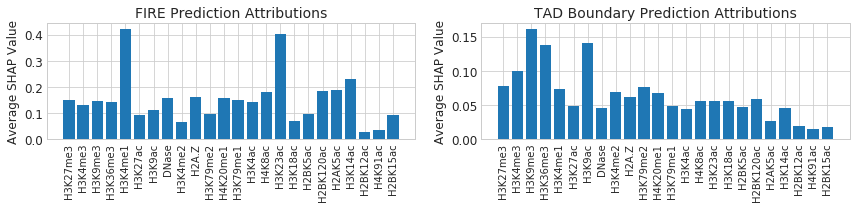

In [24]:
a = numpy.load("FIREs.shap_values2.npy")
b = numpy.load("TADs.shap_values2.npy")
for i, idx in enumerate(idxs):
    n = len(idx)
    a[i, :n] = a[i, idx]
    b[i, :n] = b[i, idx]


shap_fire = [a[:,i][a[:,i] != -1].mean() for i in range(24)]
shap_tad = [b[:,i][b[:,i] != -1].mean() for i in range(24)]

plt.figure(figsize=(12, 3))
plt.subplot(121)
plt.title("FIRE Prediction Attributions", fontsize=14)
plt.bar(range(24), shap_fire)
plt.ylabel("Average SHAP Value", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(range(24), roadmap_assays, fontsize=10, rotation=90)

plt.subplot(122)
plt.title("TAD Boundary Prediction Attributions", fontsize=14)
plt.bar(range(24), shap_tad)
plt.ylabel("Average SHAP Value", fontsize=12)
plt.yticks(fontsize=12)
plt.xticks(range(24), roadmap_assays, fontsize=10, rotation=90)
plt.tight_layout()

plt.savefig("Avocado-Supplement_Chromatin_SHAP.pdf")
plt.show()

In [25]:
for i, (celltype, assay) in enumerate(all_tracks):
    if celltype == 'E116':
        print i, assay

534 H3K27me3
535 H3K4me3
536 H3K36me3
537 H3K9ac
538 H3K4me2
539 H4K20me1
654 H3K79me2
733 H3K9me3
739 H2A.Z
764 H3K27ac
772 DNase
921 H3K4me1


In [26]:
idxs[0], numpy.argsort(idxs[0])

(array([ 0,  1,  7,  2, 11,  9,  3, 10,  4,  8,  6,  5]),
 array([ 0,  1,  3,  6,  8, 11, 10,  2,  9,  5,  7,  4]))

In [27]:
assays

['H3K27me3',
 'H3K4me3',
 'H3K9me3',
 'H3K36me3',
 'H3K4me1',
 'H3K27ac',
 'H3K9ac',
 'DNase',
 'H3K4me2',
 'H2A.Z',
 'H3K79me2',
 'H4K20me1',
 'H3K79me1',
 'H3K4ac',
 'H4K8ac',
 'H3K23ac',
 'H3K18ac',
 'H2BK5ac',
 'H2BK120ac',
 'H2AK5ac',
 'H3K14ac',
 'H2BK12ac',
 'H4K91ac',
 'H2BK15ac']

## Promoter-Enhancer Contacts

These contacts were identified in the TargetFinder paper.

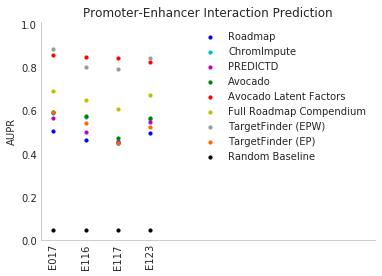

In [28]:
d = numpy.load("pei_maps20.npy")
    
idxs = numpy.argsort(d[:,4].mean(axis=1))[::-1]
d = d[idxs]
x = range(len(d))

baseline = [0.0483, 0.047, 0.0476, 0.0474]

plt.figure(figsize=(6, 4), facecolor='w')
plt.title("Promoter-Enhancer Interaction Prediction", fontsize=12)
plt.scatter(x, d[:,0].mean(axis=1), color='b', s=10, label="Roadmap")
plt.scatter(x, d[:,1].mean(axis=1), color='c', s=10, label="ChromImpute")
plt.scatter(x, d[:,2].mean(axis=1), color='m', s=10, label="PREDICTD")
plt.scatter(x, d[:,3].mean(axis=1), color='g', s=10, label="Avocado")
plt.scatter(x, d[:,4].mean(axis=1), color='r', s=10, label="Avocado Latent Factors")
plt.scatter(x, d[:,5].mean(axis=1), color='y', s=10, label="Full Roadmap Compendium")
plt.scatter(x, d[:,6].mean(axis=1), color='0.6', s=10, label="TargetFinder (EPW)")
plt.scatter(x, d[:,7].mean(axis=1), color='#FF6600', s=10, label="TargetFinder (EP)")
plt.scatter(x, baseline, color='k', s=10, label="Random Baseline")
plt.legend(fontsize=10)
plt.ylim(0.0, 1.01)
plt.ylabel("AUPR", fontsize=10)
plt.xticks(range(4), ['E017', 'E116', 'E117', 'E123'], rotation=90, fontsize=10)
plt.grid(False)
plt.yticks(fontsize=10)
plt.xlim(-0.4, 10)
seaborn.despine()
plt.show()